In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Questions for EDA:
## Survival Rate Analysis:

### What percentage of passengers survived?
### Is there a significant difference in survival rates between males and females?

## Age Distribution:

### What is the age distribution of the passengers?
### Are there any outliers or missing values in the age column?
### How does age relate to survival?

## Class and Survival:

### What is the distribution of passengers across different classes (Pclass)?
### How does ticket class affect survival rates?

## Family Influence:

### How do the number of siblings/spouses (SibSp) and parents/children (Parch) aboard influence survival rates?

## Fare Analysis:

### What is the distribution of fares paid by the passengers?
### Are there any notable differences in fare based on class or survival?

## Embarkation Points:

### What is the distribution of passengers across different embarkation points?
### Does the embarkation point have any influence on survival?

# - Understanding the data:
## - Avoid PassengerID. Then we have 2 Numerical columns (Age , Fare). Then we have 7 categorical values(Survived , Pclass , Sex , SibSp , Parch , cabin , Embarked). And 2 mixed (Name , Ticket)

#  - Now univiriate analysis. start from numerical

In [6]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [7]:
train['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [10]:
train['Age'].isnull().value_counts()   # So there are 177 null values in it

Age
False    714
True     177
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

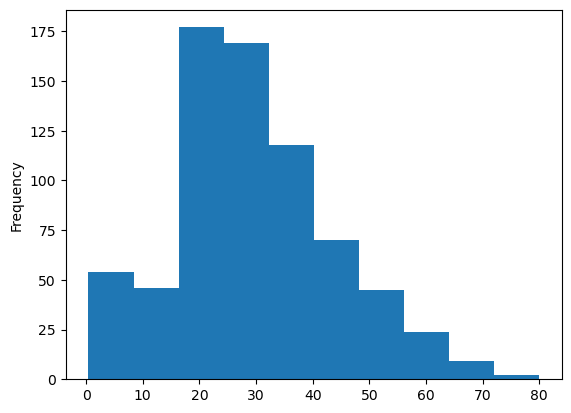

In [11]:
train['Age'].plot(kind='hist')

# . in the age of 0-15 there are a quite amount there
# . in the age of 15-40 a huge amount is there
# . then some amount of 40 to 60 or 70
# . then 1 amount of 80 or plus

<Axes: ylabel='Density'>

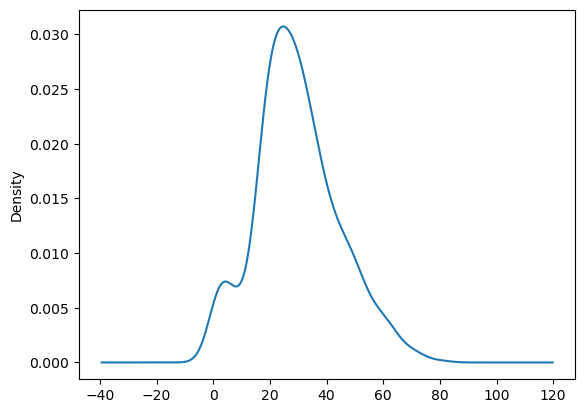

In [13]:
train['Age'].plot(kind='kde')   # so there is a little amount of skewness but its ok

In [14]:
train['Age'].skew()

0.38910778230082704

# - Now we have to find outliers

<Axes: >

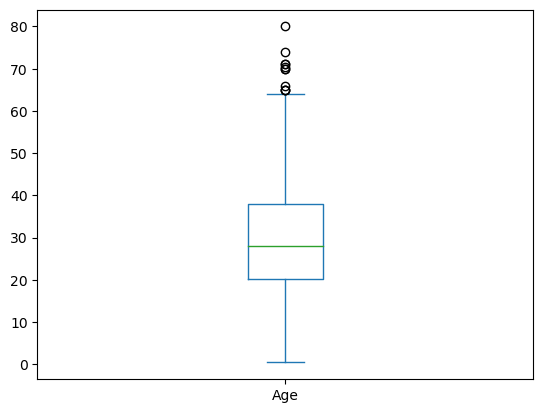

In [16]:
train['Age'].plot(kind='box')   # SO there are some outliers

# - Conclusion:
## - There are 177 null values
## - there are outliers
## - and a little bit of skewness

# - Now for Fare

In [18]:
train['Fare'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Fare
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [19]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [20]:
train['Fare'].isnull().sum()

0

<Axes: ylabel='Frequency'>

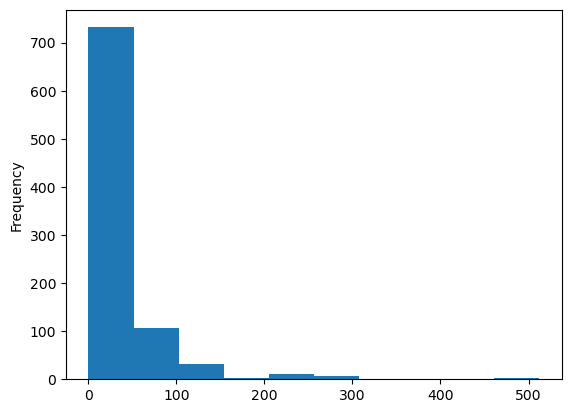

In [22]:
train['Fare'].plot(kind='hist')   # So there is one man who paid $512.329200

<Axes: ylabel='Density'>

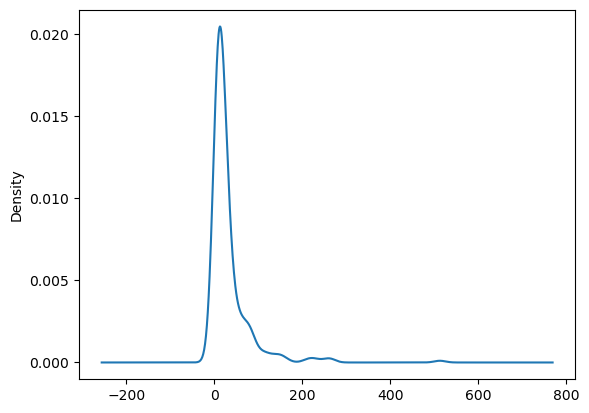

In [23]:
train['Fare'].plot(kind='kde')

In [25]:
train['Fare'].skew()  # so there is a lot of skewness

4.787316519674893

<Axes: >

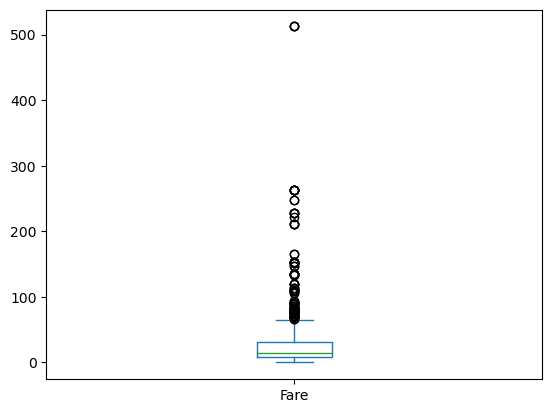

In [26]:
train['Fare'].plot(kind='box')

# - SO there is a huge amount of outliers

# Conclusion:
## - This Fare is not of 1 passenger. If there is a family it is a full family Fare. Thats why there are more amount of outliers

# - Now for catagorical values (Survived , Pclass , Sex , SibSp , Parch , cabin , Embarked)

In [29]:
train['Survived']. info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [32]:
train['Survived'].value_counts()   # 0 means died. and 1 means Survived

Survived
0    549
1    342
Name: count, dtype: int64

In [34]:
train['Survived'].value_counts().isnull().sum()

0

<Axes: xlabel='Survived'>

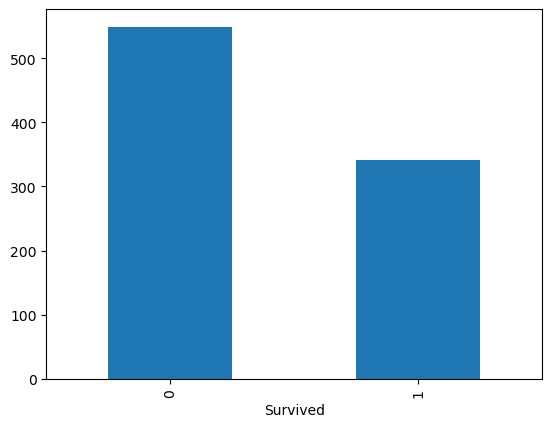

In [35]:
train['Survived'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

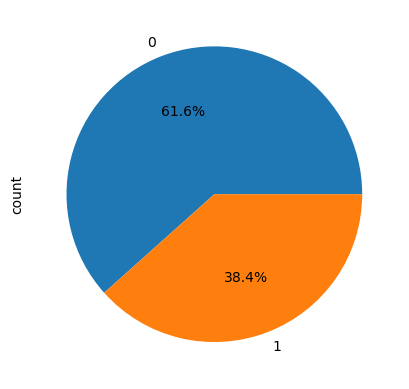

In [38]:
train['Survived'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

<Axes: >

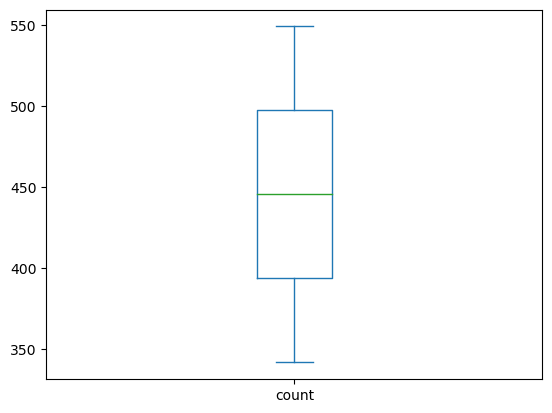

In [44]:
train['Survived'].value_counts().plot(kind='box')   # So it don't have any outliers

In [45]:
train['Survived'].value_counts().skew()

nan

# - Conclusion:
## - So there are nothing is survival but a lot of people died and some people stay survived

# - Now for Pclass

In [47]:
train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [48]:
train['Pclass'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 3 entries, 3 to 2
Series name: count
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0 bytes


<Axes: xlabel='Pclass'>

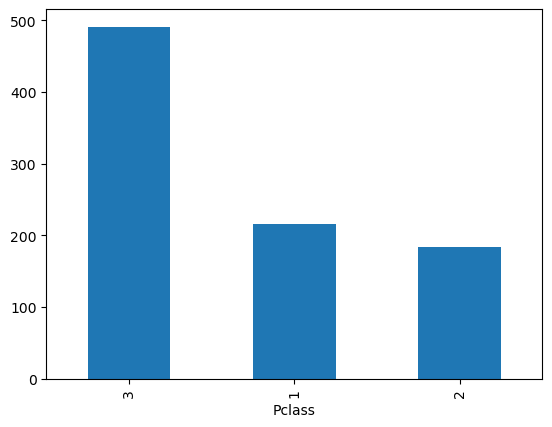

In [50]:
train['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

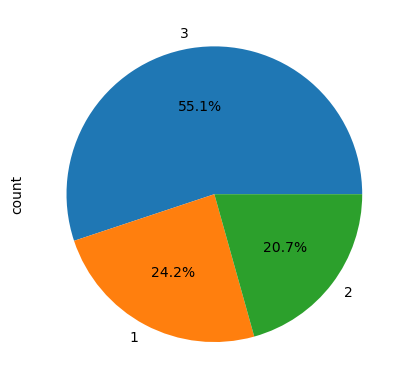

In [53]:
train['Pclass'].value_counts().plot(kind='pie' , autopct='%0.01f%%')

<Axes: >

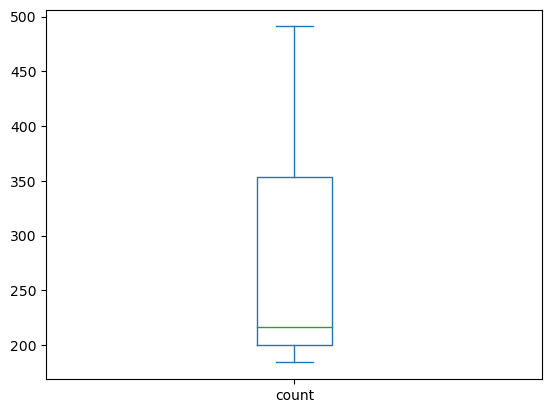

In [54]:
train['Pclass'].value_counts().plot(kind='box')

In [56]:
train['Pclass'].value_counts().skew()  # so there is some skewness

1.6622606007646399

<Axes: ylabel='Density'>

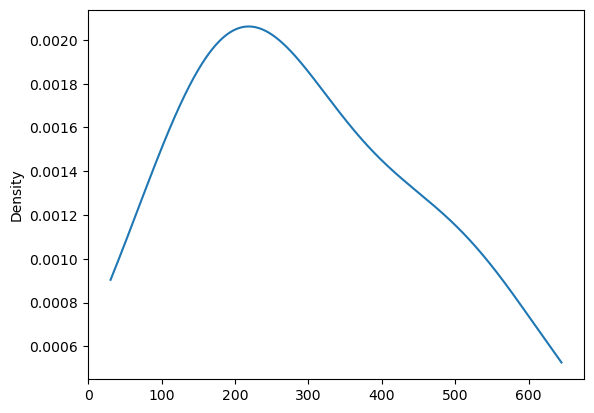

In [57]:
train['Pclass'].value_counts().plot(kind='kde')

# Conclusion
## - More people are in Pclass 3 as usual
## - The amount of people in Pclass 1 is more then Pclass 2. Which is quite strange

# - Now for sex

In [60]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [63]:
train['Sex'].value_counts().info()

<class 'pandas.core.series.Series'>
Index: 2 entries, male to female
Series name: count
Non-Null Count  Dtype
--------------  -----
2 non-null      int64
dtypes: int64(1)
memory usage: 32.0+ bytes


In [65]:
train['Sex'].value_counts().isnull().sum()

0

<Axes: xlabel='Sex'>

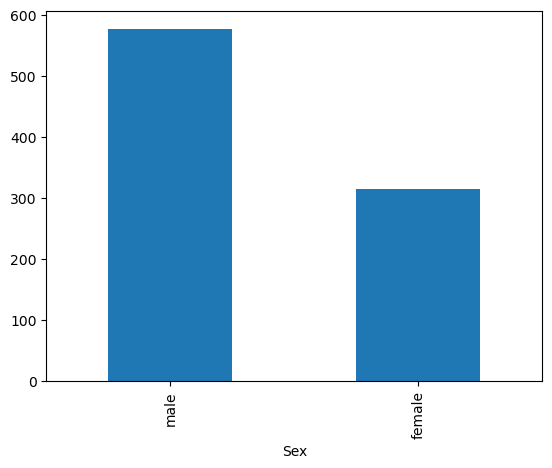

In [66]:
train['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

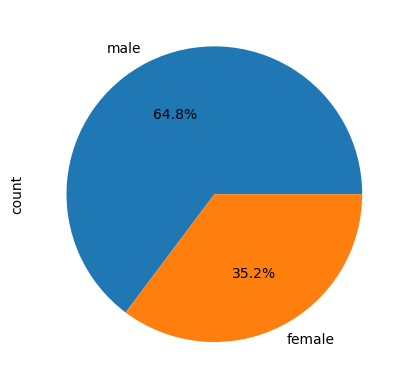

In [75]:
train['Sex'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

# - so if you are a male there is high chance to die for you. but if you are a Female There is a high chance for you to servive

<Axes: >

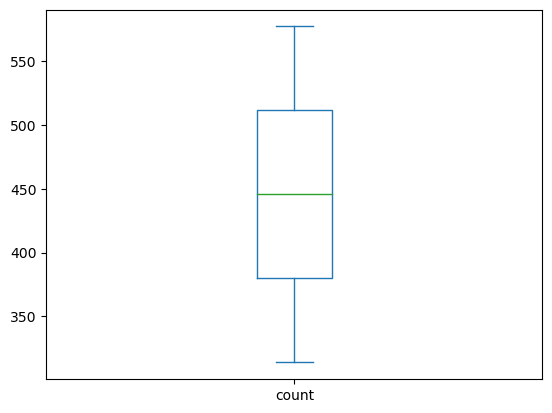

In [76]:
train['Sex'].value_counts().plot(kind='box')

In [77]:
train['Sex'].value_counts().skew()

nan

# CONCLSION:
## - So if you are a male there is high chance to die for you. but if you are a Female There is a high chance for you to servive

# - I have left the ParCh and SibSp because I will do feature Engineering on it, make it one column and then do it

# Now for Embarked
## - S means (Southampton)
## - C means (Cherbourg)
## - Q means (Queenstown)

In [99]:
train['Embarked']. value_counts().sum()

889

In [100]:
train['Embarked'].isnull().sum()

2

In [101]:
train['Embarked']. value_counts().info()

<class 'pandas.core.series.Series'>
Index: 3 entries, S to Q
Series name: count
Non-Null Count  Dtype
--------------  -----
3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


<Axes: xlabel='Embarked'>

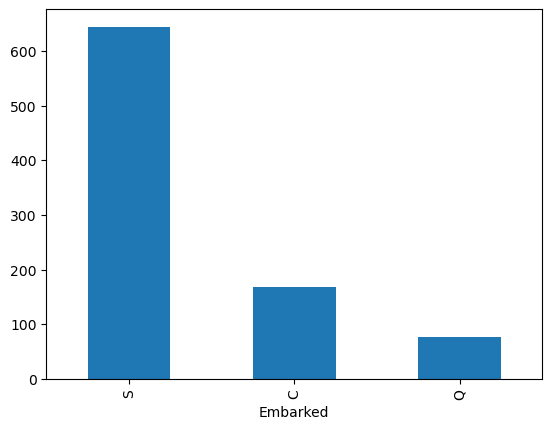

In [102]:
train['Embarked'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

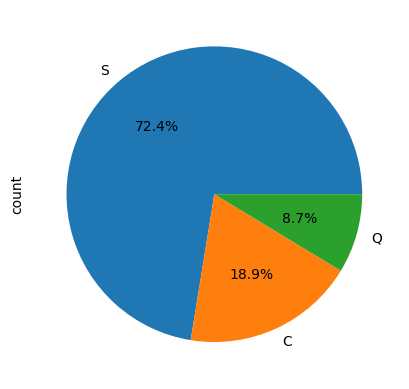

In [103]:
train['Embarked'].value_counts().plot(kind='pie' , autopct='%0.1f%%')

# - Conclusion:
## - There is a lot of people from Southampton. Then from Cherbourg and then from Queenstown

# - Now we are done with Categorical

# - We will leave the mixed columns because we will do feature Engineering to get something better

# Now biviriate columns. Remember that focus on the main column which is survived

## - Start from Survived and Pclass

In [104]:
pd.crosstab(train['Survived'] , train['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [105]:
pd.crosstab(train['Survived'] , train['Pclass'] , normalize='columns')

Pclass,1,2,3
Survived,,,
0,0.37037,0.527174,0.757637
1,0.62963,0.472826,0.242363


In [107]:
pd.crosstab(train['Survived'] , train['Pclass'] , normalize='columns')*100  # The percentage of people survived or died

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

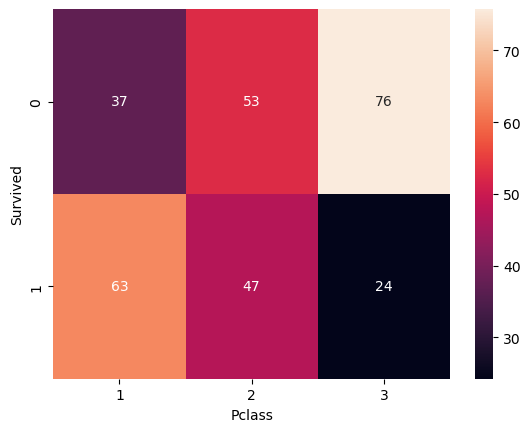

In [109]:
sns.heatmap(pd.crosstab(train['Survived'] , train['Pclass'] , normalize='columns')*100 , annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

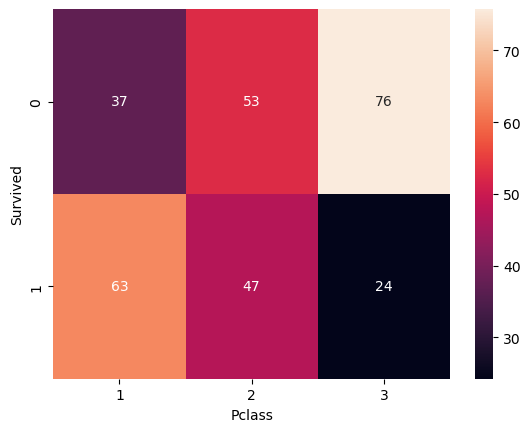

In [117]:
sns.heatmap(pd.crosstab(train['Survived'] , train['Pclass'] , normalize='columns')*100 , annot=True)

# - Conclusion: 
## - The more people of class 1 got survived. and then the class 2
## - maybe there are more female in it (I just thought)

# - Now survived with sex

In [121]:
pd.crosstab(train['Survived'] , train['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [122]:
pd.crosstab(train['Survived'] , train['Sex'] , normalize='columns')

Sex,female,male
Survived,,
0,0.257962,0.811092
1,0.742038,0.188908


In [123]:
pd.crosstab(train['Survived'] , train['Sex'] , normalize='columns')*100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

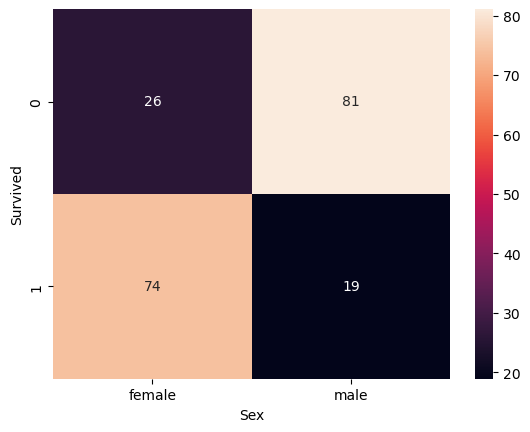

In [125]:
sns.heatmap(pd.crosstab(train['Survived'] , train['Sex'] , normalize='columns')*100 , annot=True)

# Conclusion:
## - The large amount of male died 75%
## - 80% of female survived

# First categorical with categorical

# now survived with Embarked

In [158]:
pd.crosstab(train['Survived'] ,train['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [157]:
pd.crosstab(train['Survived'] ,train['Embarked'] , normalize='columns')

Embarked,C,Q,S
Survived,,,
0,0.446429,0.61039,0.663043
1,0.553571,0.38961,0.336957


In [159]:
pd.crosstab(train['Survived'] ,train['Embarked'] , normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


<Axes: xlabel='Embarked', ylabel='Survived'>

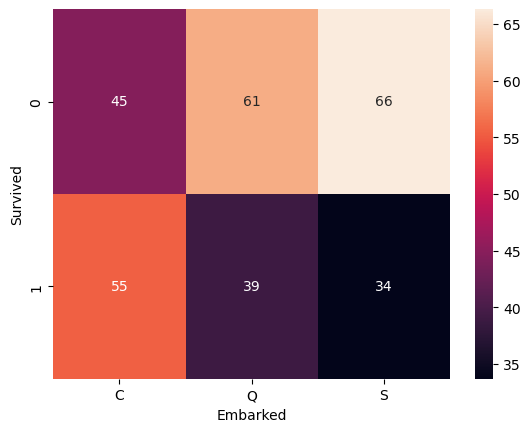

In [161]:
sns.heatmap(pd.crosstab(train['Survived'] ,train['Embarked'] , normalize='columns')*100 , annot=True)

## - The more people from Cherbourg got survived. It means two things (1) More passengers of Cherbourg are females. (2) The more passenges of Cherbourg are from class 1
## - We will check it

In [162]:
pd.crosstab(train['Sex'] ,train['Embarked'] , normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


# - We have found that the value of female in C and Q is almost the same. So it is proved that this is not because of gender. Maybe it is because of Pclass, I will check it

In [163]:
pd.crosstab(train['Pclass'] ,train['Embarked'] , normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


# - Yeah there is more amount of Pclass 1 from C 

# CONCLUSION:
## - If you are from C there is more chance for you to survive.
## - if you are from Q and S it is high chance for you to die

# - Now with numerical

# Now survived with age

In [172]:
# We will take the age of survived and died and compare it
train[train['Survived'] == 1] ['Age']
train[train['Survived'] == 1] ['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

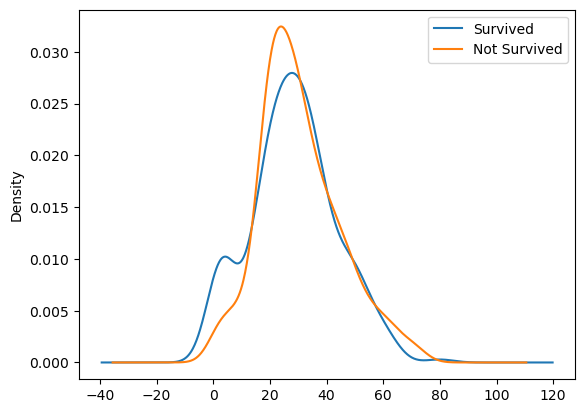

In [174]:
train[train['Survived'] == 1] ['Age'].plot(kind='kde' , label='Survived')
train[train['Survived'] == 0] ['Age'].plot(kind='kde' , label='Not Survived')

plt.legend()

# - CONCLUSION:
## - more young people got survived.
## - Reasons:
### - maybe more young people are from Pclass 1   (But this is not valid I think)
### - Or more youg are female   (But this is not valid I think)
### - The amount of young people are more. (a lot of them died and a lot of them got survived)

# - CONCLUSION:
## - The more clildern got survived
## - And some olders got survived
## - But more of the men between 15-40 died

# - Now this is a time for feature engineering

# - So we will get 1 column from fare because it is a fare of a whole family

In [179]:
train['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [184]:
train[train['SibSp'] == 8]  # the problem is this family has 11 people (8+2+1) but it is showing 8. The other is in test datafram

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


## - importing test datafram

In [5]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# - Now concatinate them

In [7]:
titanic = pd.concat([test , train])
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


In [195]:
titanic[titanic['SibSp'] == 8]   # Not working with SIbSp. Try it with ticket

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN
159,160,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
180,181,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
201,202,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
324,325,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
846,847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,0.0


In [196]:
titanic[titanic['Ticket'] == 'CA. 2343']   # Yeah its perfact

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S,NaN
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S,NaN
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S,NaN
159,160,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
180,181,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
201,202,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
324,325,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
792,793,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,0.0
846,847,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,0.0


# - Now its full so we will create a new column called individual fare

In [212]:
titanic['Individual_fare'] = titanic['Fare'] / (titanic['SibSp'] + titanic['Parch'] + 1)

In [213]:
titanic   # Now it is perfact

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Individual Fare,Family_size,Individual_fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,7.829200,1,7.829200
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,3.500000,2,3.500000
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,9.687500,1,9.687500
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,8.662500,1,8.662500
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,4.095833,3,4.095833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,13.000000,1,13.000000
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,30.000000,1,30.000000
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,5.862500,4,5.862500
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,30.000000,1,30.000000


<Axes: >

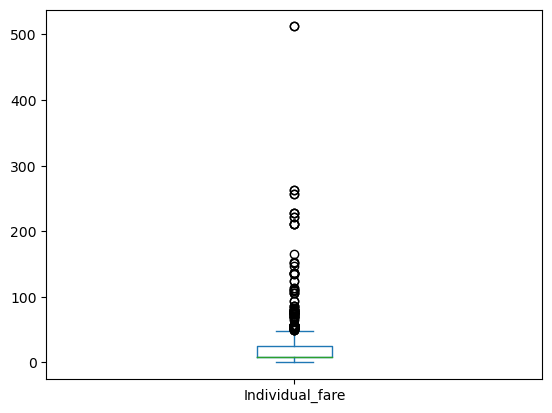

In [214]:
titanic['Individual_fare'].plot(kind='box')   # No yar there is still a outlires

In [215]:
titanic['Individual_fare'].describe()

count    1308.000000
mean       20.518215
std        35.774337
min         0.000000
25%         7.452767
50%         8.512483
75%        24.237500
max       512.329200
Name: Individual_fare, dtype: float64

In [216]:
titanic['Individual_fare'].info()

<class 'pandas.core.series.Series'>
Index: 1309 entries, 0 to 890
Series name: Individual_fare
Non-Null Count  Dtype  
--------------  -----  
1308 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


# - There is actually someone who paid 512 individually

In [217]:
titanic[titanic['Individual_fare']==512.329200]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Individual Fare,Family_size,Individual_fare
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,1.0,512.3292,1,512.3292
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1.0,512.3292,1,512.3292


# - Yeah so there are 2 people who really paid 512 dollars

In [222]:
titanic['Family_size'] = titanic['SibSp'] + titanic['Parch'] + 1

In [223]:
# if he is alone then alone
# if 2-4 then small family
# if more then 4 then large family
def family(num):
    if (num == 1):
        return 'Alone'
    elif(num > 1 and num <= 4):
        return 'Small'
    else:
        return 'Large'

In [228]:
titanic['Family_type'] = titanic['Family_size'].apply(family)

In [8]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0


# - Now again EDA on that new column

In [230]:
pd.crosstab(titanic['Survived'] , titanic['Family_type'])   # Note it is a biviriate. you can do univiriate

Family_type,Alone,Large,Small
Survived,,,
0.0,374,52,123
1.0,163,10,169


In [231]:
pd.crosstab(titanic['Survived'] , titanic['Family_type'] , normalize='columns')

Family_type,Alone,Large,Small
Survived,,,
0.0,0.696462,0.83871,0.421233
1.0,0.303538,0.16129,0.578767


In [232]:
pd.crosstab(titanic['Survived'] , titanic['Family_type'] , normalize='columns')*100

Family_type,Alone,Large,Small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='Family_type', ylabel='Survived'>

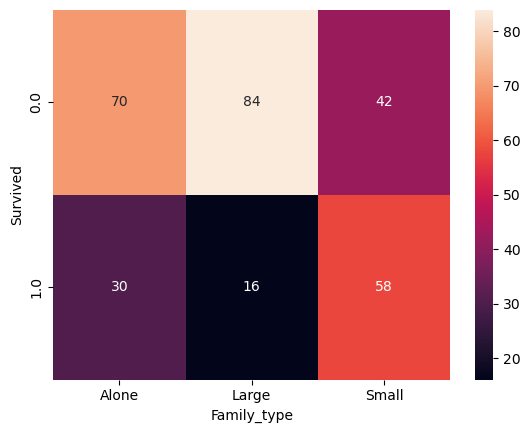

In [234]:
sns.heatmap(pd.crosstab(titanic['Survived'] , titanic['Family_type'] , normalize='columns')*100 , annot=True)

# CONCLUSION:
## - If you are alone than the chances of your survival is less                      30.353818%
## - If you are in large family than the chances of your survival is less         16.129032%
## - But if you are in small family the chances of your survival is more         57.876712%
# - So our created new column is usefull

# - Now we are left with mixed columns which is name and ticket (Ticket is not that important)

In [9]:
titanic['Name'].str.split(',')   # actually I am taking the surname which is separated by comma 

0                                  [Kelly,  Mr. James]
1                  [Wilkes,  Mrs. James (Ellen Needs)]
2                         [Myles,  Mr. Thomas Francis]
3                                  [Wirz,  Mr. Albert]
4      [Hirvonen,  Mrs. Alexander (Helga E Lindqvist)]
                            ...                       
886                           [Montvila,  Rev. Juozas]
887                    [Graham,  Miss. Margaret Edith]
888        [Johnston,  Miss. Catherine Helen "Carrie"]
889                           [Behr,  Mr. Karl Howell]
890                             [Dooley,  Mr. Patrick]
Name: Name, Length: 1309, dtype: object

In [10]:
titanic['Name'].str.split(',').str.get(0)  # these are the surnames

0         Kelly
1        Wilkes
2         Myles
3          Wirz
4      Hirvonen
         ...   
886    Montvila
887      Graham
888    Johnston
889        Behr
890      Dooley
Name: Name, Length: 1309, dtype: object

In [11]:
titanic['Surname'] = titanic['Name'].str.split(',').str.get(0)

# - Now we will take a title like Mr. or Ms.

In [12]:
titanic['Name'].str.split(',')

0                                  [Kelly,  Mr. James]
1                  [Wilkes,  Mrs. James (Ellen Needs)]
2                         [Myles,  Mr. Thomas Francis]
3                                  [Wirz,  Mr. Albert]
4      [Hirvonen,  Mrs. Alexander (Helga E Lindqvist)]
                            ...                       
886                           [Montvila,  Rev. Juozas]
887                    [Graham,  Miss. Margaret Edith]
888        [Johnston,  Miss. Catherine Helen "Carrie"]
889                           [Behr,  Mr. Karl Howell]
890                             [Dooley,  Mr. Patrick]
Name: Name, Length: 1309, dtype: object

In [14]:
titanic['Name'].str.split(',').str.get(1)

0                                Mr. James
1                 Mrs. James (Ellen Needs)
2                       Mr. Thomas Francis
3                               Mr. Albert
4       Mrs. Alexander (Helga E Lindqvist)
                      ...                 
886                            Rev. Juozas
887                   Miss. Margaret Edith
888         Miss. Catherine Helen "Carrie"
889                        Mr. Karl Howell
890                            Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [15]:
titanic['Name'].str.split(',').str.get(1).str.strip()

0                               Mr. James
1                Mrs. James (Ellen Needs)
2                      Mr. Thomas Francis
3                              Mr. Albert
4      Mrs. Alexander (Helga E Lindqvist)
                      ...                
886                           Rev. Juozas
887                  Miss. Margaret Edith
888        Miss. Catherine Helen "Carrie"
889                       Mr. Karl Howell
890                           Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [16]:
titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ')

0                                  [Mr., James]
1                 [Mrs., James, (Ellen, Needs)]
2                        [Mr., Thomas, Francis]
3                                 [Mr., Albert]
4      [Mrs., Alexander, (Helga, E, Lindqvist)]
                         ...                   
886                              [Rev., Juozas]
887                    [Miss., Margaret, Edith]
888         [Miss., Catherine, Helen, "Carrie"]
889                         [Mr., Karl, Howell]
890                              [Mr., Patrick]
Name: Name, Length: 1309, dtype: object

In [17]:
titanic['Title'] = titanic['Name'].str.split(',').str.get(1).str.strip().str.split(' ').str.get(0)

In [18]:
titanic['Title'].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Ms.            2
Major.         2
Mlle.          2
Sir.           1
the            1
Capt.          1
Don.           1
Lady.          1
Mme.           1
Dona.          1
Jonkheer.      1
Name: count, dtype: int64

In [302]:
# First, create a dictionary to map titles to replacements
replace_dict = {
    'Rev.': 'other', 'Dr.': 'other', 'Col.': 'other', 'Major.': 'other', 'Mlle.': 'otherother', 
    'the': 'other', 'Capt.': 'other', 'Don.': 'other', 'Lady.': 'other', 'Mme.': 'other', 
    'Dona.': 'other', 'Jonkheer.': 'other'
}

# Apply the replacements using the replace() method
titanic['Title'] = titanic['Title'].replace(replace_dict , regex=True)


In [22]:
titanic['Title'] = titanic['Title'].replace('Dr.' , 'other')
titanic['Title'] = titanic['Title'].replace('Rev.' , 'other')
titanic['Title'] = titanic['Title'].replace('Col.' , 'other')
titanic['Title'] = titanic['Title'].replace('Major.' , 'other')
titanic['Title'] = titanic['Title'].replace('Mlle.' , 'other')
titanic['Title'] = titanic['Title'].replace('the' , 'other')
titanic['Title'] = titanic['Title'].replace('Capt.' , 'other')
titanic['Title'] = titanic['Title'].replace('Don.' , 'other')
titanic['Title'] = titanic['Title'].replace('Jonkheer.' , 'other')
titanic['Title'] = titanic['Title'].replace('Mme.' , 'other')
titanic['Title'] = titanic['Title'].replace('Dona.' , 'other')


titanic['Title'] = titanic['Title'].replace('Ms.' , 'Miss.')
titanic['Title'] = titanic['Title'].replace('Sir.' , 'Mr.')
titanic['Title'] = titanic['Title'].replace('Lady.' , 'Miss.')

# So what we actually did is, we replace these titles and make it some titles now it is a catagorical value

In [23]:
titanic['Title'].value_counts()

Title
Mr.        758
Miss.      263
Mrs.       197
Master.     61
other       30
Name: count, dtype: int64

In [24]:
titanic[titanic['Title']=='other']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Surname,Title
131,1023,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C,NaN,Gracie,other
149,1041,2,"Lahtinen, Rev. William",male,30.0,1,1,250651,26.0000,NaN,S,NaN,Lahtinen,other
164,1056,2,"Peruschitz, Rev. Joseph Maria",male,41.0,0,0,237393,13.0000,NaN,S,NaN,Peruschitz,other
202,1094,1,"Astor, Col. John Jacob",male,47.0,1,0,PC 17757,227.5250,C62 C64,C,NaN,Astor,other
293,1185,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,NaN,Dodge,other
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN,Oliva y Ocana,other
30,31,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,0.0,Uruchurtu,other
149,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S,0.0,Byles,other
150,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S,0.0,Bateman,other
245,246,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,0.0,Minahan,other


In [25]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Surname,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,Kelly,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,Wilkes,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,Myles,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,Wirz,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,Hirvonen,Mrs.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,Montvila,other
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,Graham,Miss.
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Johnston,Miss.
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,Behr,Mr.


# - Now do biviriate analysis between survived and Titles and sirvived with Surname

In [27]:
pd.crosstab(titanic['Surname'] , titanic['Survived'])

Survived,0.0,1.0
Surname,,
Abbing,1,0
Abbott,1,1
Abelson,1,1
Adahl,1,0
Adams,1,0
...,...,...
de Mulder,0,1
de Pelsmaeker,1,0
del Carlo,1,0


In [28]:
pd.crosstab(titanic['Surname'] , titanic['Survived'], normalize='columns')

Survived,0.0,1.0
Surname,,
Abbing,0.001821,0.000000
Abbott,0.001821,0.002924
Abelson,0.001821,0.002924
Adahl,0.001821,0.000000
Adams,0.001821,0.000000
...,...,...
de Mulder,0.000000,0.002924
de Pelsmaeker,0.001821,0.000000
del Carlo,0.001821,0.000000


In [29]:
pd.crosstab(titanic['Surname'] , titanic['Survived'], normalize='columns')*100

Survived,0.0,1.0
Surname,,
Abbing,0.182149,0.000000
Abbott,0.182149,0.292398
Abelson,0.182149,0.292398
Adahl,0.182149,0.000000
Adams,0.182149,0.000000
...,...,...
de Mulder,0.000000,0.292398
de Pelsmaeker,0.182149,0.000000
del Carlo,0.182149,0.000000


<Axes: ylabel='Density'>

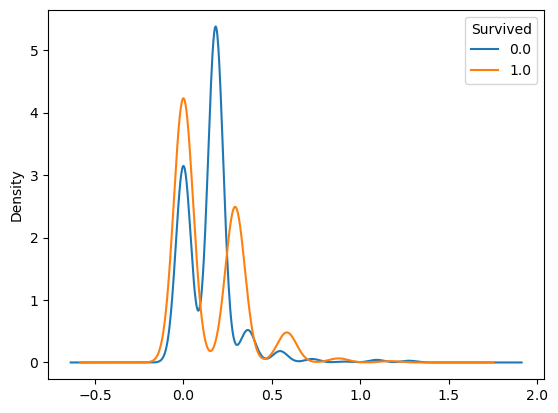

In [39]:
(pd.crosstab(titanic['Surname'] , titanic['Survived'], normalize='columns')*100).plot(kind='kde')

# - Now survived with Titles

In [51]:
pd.crosstab( titanic['Survived'] , titanic['Title'])

Title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,17,55,436,26,15
1.0,23,129,82,99,9


In [52]:
pd.crosstab(titanic['Survived'] , titanic['Title'] , normalize='columns')

Title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,0.425,0.298913,0.841699,0.208,0.625
1.0,0.575,0.701087,0.158301,0.792,0.375


In [53]:
pd.crosstab(titanic['Survived'] , titanic['Title'] , normalize='columns')*100

Title,Master.,Miss.,Mr.,Mrs.,other
Survived,,,,,
0.0,42.5,29.891304,84.169884,20.8,62.5
1.0,57.5,70.108696,15.830116,79.2,37.5


<Axes: xlabel='Title', ylabel='Survived'>

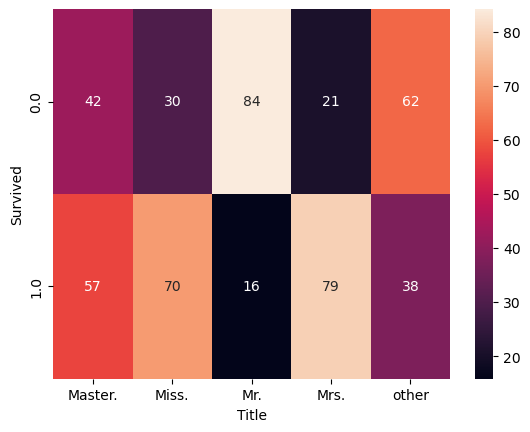

In [55]:
sns.heatmap(pd.crosstab(titanic['Survived'] , titanic['Title'] , normalize='columns')*100 , annot=True)

# CONCLUSION:
## - So it is cleared again that if you are a Mr. Then it is a high chance for you to die.
## - But if you are a Miss. Or Mrs. Then it is a high chance for you to survive
## - The Master give sacrifice of their lives to save people but still some of them survived.
## - and if you are a other. Then it is a high chance for you to die.
## - So again Our created columns are usefull

# - Now get back to the cabin. We have something to do in it. There was some missing values in it.

# - We are creating a new column called deck which has the deck information 


In [58]:
titanic['Cabin'].str[0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 1309, dtype: object

In [59]:
# Storing it in a column

titanic['Deck'] = titanic['Cabin'].str[0]

In [80]:
# Now we will fill the null value

titanic['Deck'].fillna('M' , inplace=True)   # M for Missing

In [81]:
titanic['Deck'].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [82]:
titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Surname,Title,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,Kelly,Mr.,M
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN,Wilkes,Mrs.,M
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN,Myles,Mr.,M
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,Wirz,Mr.,M
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN,Hirvonen,Mrs.,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.0,Montvila,other,M
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1.0,Graham,Miss.,B
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.0,Johnston,Miss.,M
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1.0,Behr,Mr.,C


# - Now biviriate analysis between Deck and Pclass
# - Then biviriate analysis between Deck and Survived

In [83]:
pd.crosstab(titanic['Pclass'] , titanic['Deck'])

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,22,65,94,40,34,0,0,67,1
2,0,0,0,6,4,13,0,254,0
3,0,0,0,0,3,8,5,693,0


In [84]:
pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='columns')

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,1.0,1.0,1.0,0.869565,0.829268,0.000000,0.0,0.066075,1.0
2,0.0,0.0,0.0,0.130435,0.097561,0.619048,0.0,0.250493,0.0
3,0.0,0.0,0.0,0.000000,0.073171,0.380952,1.0,0.683432,0.0


In [88]:
pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='columns')*100

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,100.0,100.0,100.0,86.956522,82.926829,0.000000,0.0,6.607495,100.0
2,0.0,0.0,0.0,13.043478,9.756098,61.904762,0.0,25.049310,0.0
3,0.0,0.0,0.0,0.000000,7.317073,38.095238,100.0,68.343195,0.0


<Axes: xlabel='Deck', ylabel='Pclass'>

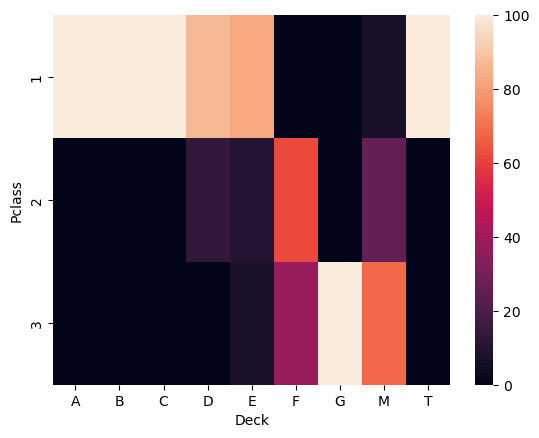

In [89]:
sns.heatmap(pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='columns')*100)

<Axes: xlabel='Deck', ylabel='Pclass'>

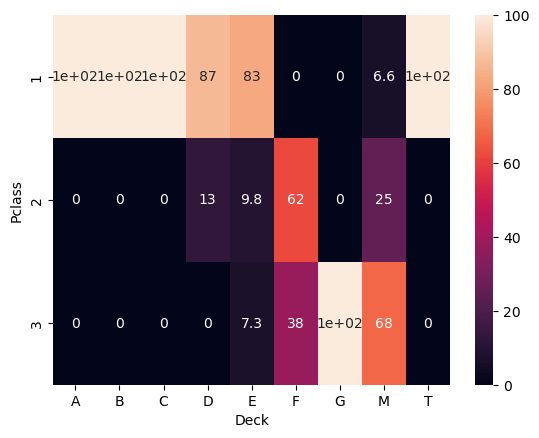

In [90]:
sns.heatmap(pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='columns')*100 , annot=True)

In [95]:
pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='index')

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,0.068111,0.201238,0.291022,0.123839,0.105263,0.000000,0.000000,0.207430,0.003096
2,0.000000,0.000000,0.000000,0.021661,0.014440,0.046931,0.000000,0.916968,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.004231,0.011283,0.007052,0.977433,0.000000


In [96]:
pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='index')*100

Deck,A,B,C,D,E,F,G,M,T
Pclass,,,,,,,,,
1,6.811146,20.123839,29.102167,12.383901,10.526316,0.000000,0.000000,20.743034,0.309598
2,0.000000,0.000000,0.000000,2.166065,1.444043,4.693141,0.000000,91.696751,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.423131,1.128350,0.705219,97.743300,0.000000


<Axes: xlabel='Deck', ylabel='Pclass'>

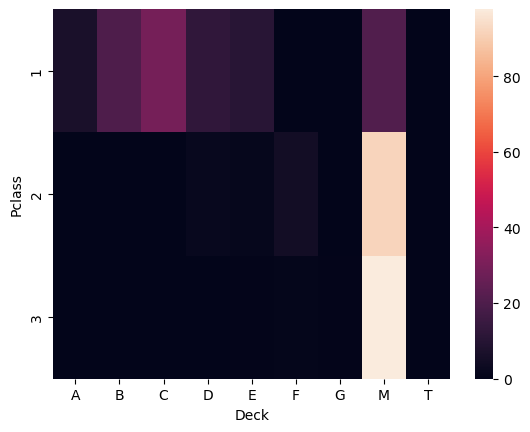

In [98]:
sns.heatmap(pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='index')*100)

<Axes: xlabel='Deck', ylabel='Pclass'>

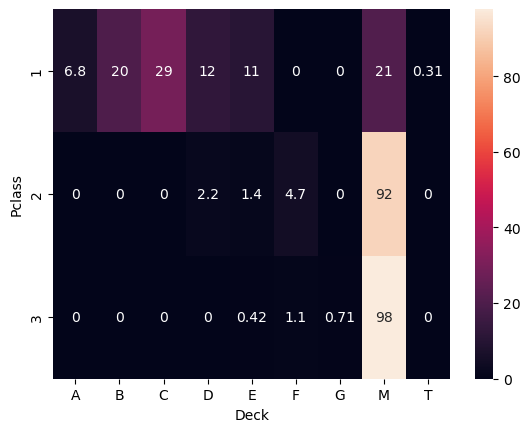

In [99]:
sns.heatmap(pd.crosstab(titanic['Pclass'] , titanic['Deck'] , normalize='index')*100 , annot=True)

# - Now deck with survived

In [100]:
pd.crosstab(titanic['Survived'] , titanic['Deck'])

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,8,12,24,8,8,5,2,481,1
1.0,7,35,35,25,24,8,2,206,0


In [101]:
pd.crosstab(titanic['Survived'] , titanic['Deck'] , normalize='columns')

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,0.533333,0.255319,0.40678,0.242424,0.25,0.384615,0.5,0.700146,1.0
1.0,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.299854,0.0


In [102]:
pd.crosstab(titanic['Survived'] , titanic['Deck'] , normalize='columns')*100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='Deck', ylabel='Survived'>

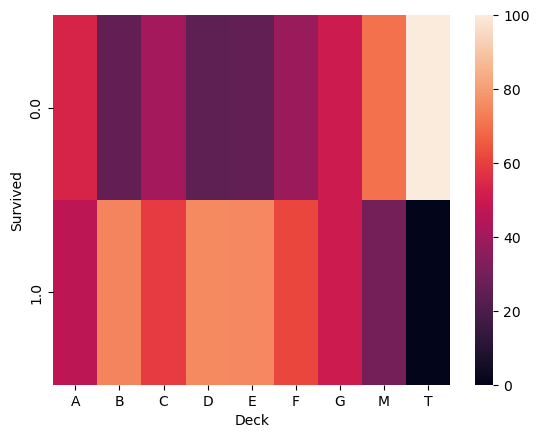

In [103]:
sns.heatmap(pd.crosstab(titanic['Survived'] , titanic['Deck'] , normalize='columns')*100)

<Axes: xlabel='Deck', ylabel='Survived'>

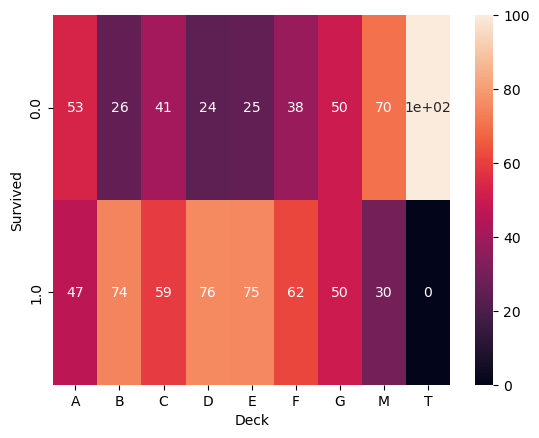

In [104]:
sns.heatmap(pd.crosstab(titanic['Survived'] , titanic['Deck'] , normalize='columns')*100 , annot=True)

# CONCLUSION:
## - If you are from deck (B , C , D , E , F) the chances of your survival is high
## - If you are from dec (A , G) The chances of your survival is 50 50
## - If you are from deck (T) Or your deck is missing it is high chance for you to die

# Questions for EDA:
## Survival Rate Analysis:

### What percentage of passengers survived?
### ANS: 34.4
### Is there a significant difference in survival rates between males and females?
### ANS: Yes if you are a male there is high chance to die for you. but if you are a Female There is a high chance for you to servive *0% female survived

## Age Distribution:

### What is the age distribution of the passengers?
### ANS: Most of the passengers was young
### Are there any outliers or missing values in the age column?
### ANS: I think no because the elder one is 80.
### How does age relate to survival?
### ANS: If you are child or young then It is high chance for you to survive

## Class and Survival:

### What is the distribution of passengers across different classes (Pclass)?
### ANS: If you are from high class your survival rate is high. If you are from deck (B , C , D , E , F) the chances of your survival is high.

## Family Influence:

### How do the number of siblings/spouses (SibSp) and parents/children (Parch) aboard influence survival rates?
### ANS: If you are alone or traveling with large family(more then 5) Then the chances of your survival is low. But if you are traveling with small family (less then 5) your chances of survival is high.

## Fare Analysis:

### What is the distribution of fares paid by the passengers?
### ANS: The fares were of full family. I have separated it and make an individual fare column. you can see it.

## Embarkation Points:

### What is the distribution of passengers across different embarkation points?
### ANS: 72.4% passengers were from Southampton. 18.9% were from Cherbourg. and 8.7% were from Queenstown
### Does the embarkation point have any influence on survival?
### ANS: 55% passengers of Cherbourg get survived. 39% of Queenstown. and only 34% of Southhampton